In [1]:
# 18222757 Maciej Augustynek ,18244327 Bartlomiej Skorecki
# Code executes till the end without errors
# Original source : https://www.kaggle.com/esraamohamedahmed/classification-of-butterflies-images

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd
import os


In [3]:
import cv2
path='./images/'
file=os.listdir('./images/')
features=[] #to store images
labels=[] #to store labels
for img in file:
    # label=int(img) 
    label=int(img[:3]) #extracting labels from the image,it is the third number
    labels.append(label) #list of labels
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
    img_array=cv2.resize(img_array,(220,220))
    features.append(img_array)

In [4]:
import os
descrid_path='./descriptions'
descrid=os.listdir('./descriptions')
descrid

['001.txt',
 '002.txt',
 '003.txt',
 '004.txt',
 '005.txt',
 '006.txt',
 '007.txt',
 '008.txt',
 '009.txt',
 '010.txt']

In [5]:
dict_1={'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '0010': 'Vanessa_cardui'} 

In [6]:
print(set(labels))
list_labels=[]
# A lobe was created to spin around all the numbers that were extracted which were in the 3rd order in the name sequence for each picture
for i in labels:
# make a new list of labels have the names / categories in characters
    new_label=dict_1['00'+str(i)]
    list_labels.append(new_label)
# Here we display 10 fixed and non-repetitive categories
print(list_labels[:10])    

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
['Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus', 'Danaus_plexippus']


In [7]:
import numpy as np
features=np.array(features)
# get lower quality image by dividing the features by 255, to make it appropriate for preprocessing
features=features/255.0

In [8]:
print(features.shape)

(832, 220, 220, 3)


In [9]:
features=features.reshape(-1,220,220,3)

In [10]:
print(features.shape)

(832, 220, 220, 3)


In [11]:
#OneHotEncoding:To deal with categorical values we need to preprocess it using onehot ecnoding¶
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
le=LabelEncoder()
y=le.fit_transform(list_labels)
from tensorflow.keras.utils import to_categorical
y=to_categorical(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(features,y,random_state=11,test_size=0.2)

In [13]:
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2,l1
model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", activation = 'relu', kernel_regularizer=l2(0.0002) , input_shape=(220,220,3)))
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(32, (5, 5), activation='relu', kernel_regularizer=l1(0.0002))) 
model.add(MaxPooling2D((3,3)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu' , kernel_regularizer=l2(0.0002))) 
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
# dropout layer that used for avoiding the overfitting 
model.add(Dropout(0.3))
model.add(Dense(100, activation='relu'))

# Output layer have 10 labels 
model.add(Dense(10, activation='softmax'))

In [14]:
model.compile(optimizer='adam'
              ,metrics=['accuracy'],loss='categorical_crossentropy')
history=model.fit(x_train,y_train,batch_size=12,epochs=50,validation_split=0.2)

Epoch 1/5
45/45 [==============================] - 7s 138ms/step - loss: 2.4528 - accuracy: 0.1241 - val_loss: 2.4000 - val_accuracy: 0.1203
Epoch 2/5
45/45 [==============================] - 6s 137ms/step - loss: 2.3634 - accuracy: 0.1429 - val_loss: 2.3438 - val_accuracy: 0.1579
Epoch 3/5
45/45 [==============================] - 6s 134ms/step - loss: 2.1124 - accuracy: 0.2256 - val_loss: 1.8458 - val_accuracy: 0.3233
Epoch 4/5
45/45 [==============================] - 6s 132ms/step - loss: 1.7349 - accuracy: 0.3684 - val_loss: 1.6604 - val_accuracy: 0.4060
Epoch 5/5
45/45 [==============================] - 6s 131ms/step - loss: 1.3434 - accuracy: 0.5395 - val_loss: 1.3295 - val_accuracy: 0.5564


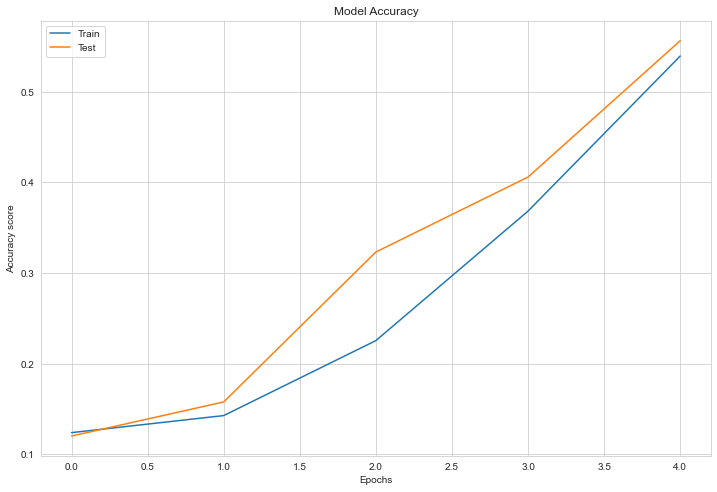

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()

In [16]:
loss,accuracy=model.evaluate(x_test,y_test)

6/6 [==============================] - 0s 59ms/step - loss: 1.3117 - accuracy: 0.5090


In [ ]:
import tensorflow
# This network has many hyper parameters that you have to adjust first
# The first hyperparameter gives you the freedom to choose whether to enter the final dense layer of the network or cancel it, in which case it has been cancelled.
mnet = tensorflow.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, 
                                                      input_shape=(220, 220, 3),#same as of custom model
                                                      pooling='avg',
                                                      weights='imagenet')

mnet.summary()

In [ ]:
model2=Sequential([
    mnet,
    Dropout(0.25),
    Dense(10,activation='softmax') # here we use 10 layers because we have to predict bewtween 10 classes
])

In [ ]:
# here we freezed the layer that responsible for feature extraction
model2.layers[0].trainable = False
model2.summary()

In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history2=model2.fit(x_train,y_train,batch_size=12, epochs=10,validation_split=0.3)

In [ ]:
loss,accuracy=model2.evaluate(x_test,y_test)
sns.set_style('darkgrid')
plt.figure(figsize=(12,8))
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy score')
plt.title('Model Accuracy')
plt.legend(['Train','Test'])
plt.show()